# Linear Regression with Python

## Multiple Linear Regression using Python

### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For **multiple linear regression**, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectKBest

### About the dataset
This is a simulated dataset made for teaching regression containing 10 independent variables named **Feat01, Feat02..., Feat10** and a dependent variable called **Target**. 

### The task
The task at hand is to predict the **Target** variable such that the values of predictions are as close to the actual values as possible. This will be done using a multiple linear regression model.

In [2]:
# Loading data
data = pd.read_csv("data.csv")
data.head()

,Feat01,Feat02,Feat03,Feat04,Feat05,Feat06,Feat07,Feat08,Feat09,Feat10,Target
0,0,11617.463,135.935905,10960,491.597396,80.714963,0.675678,16.891946,0.506758,1.198996,137
1,0,1086607.005,1983.900611,13065,1391.028397,64.221576,0.880523,0.146754,0.146754,1.230974,335
2,0,37945.952,2726.252884,8772,222.952910,37.589307,0.325336,16.266790,0.488004,1.208015,172
3,0,79471.821,3448.065646,36414,883.345912,662.170505,0.257565,0.000000,0.128782,1.256901,867
4,1,5486.580,1509.753541,13040,742.253326,99.315014,0.129816,0.000000,0.129816,1.255410,815


In [3]:
X = data.drop(["Target"],axis=1) # Explanatory(independent) variables
y = data["Target"] # Dependent variable

### Train/test split
Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.  

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

### Training a linear regression model
We will train a linear regression model using all ten available features. The `fit` method of the `LinearRegression()` class trains models and estimates the best possible intercept and coefficient(s). 

In [5]:
# Fitting a linear model for multiple linear regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# The coefficients for each columns
model_coefs = pd.DataFrame({'Feature/Column':list(X_train.columns),"Coefficients":model.coef_})
model_coefs

,Feature/Column,Coefficients
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


In [7]:
# The model's intercept
model.intercept_

-13397.877366112254

### Taking predictions
We can use `predict` method to take predictions of the test set.

In [8]:
# Taking predictions
y_pred = model.predict(X_test)

### Model Evaluation
We will be evaluating the model now. We will start by using the metrics R-squared score and RMSE.

**R-squared score** - This score varies from 0 to 1 and represents the proportion of variance of the dependent variable explained by the independent variable(s). It conveys the extent to which the variance of one variable explains the variance of the other. The ideal score is 1.0 which conveys that 100% of the variance of the dependent variable is explained by the independent variables.

In [9]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))

The R-squared score is 0.8978


The model used above explains only 89.78% variance of the dependent variable. This can be improved using more data and better features.

**Root Mean Squared Error(RMSE)** - RMSE is the standard deviation of the residuals (prediction errors). It measures the spread of the data around the line of best fit. RMSE is always non-negative with a value of 0 being ideal. A lower RMSE is better than a higher one. RMSE of two different datasets should not be compared as this measure is dependent on the scales of the data.

\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n \left(\hat{y_i} - y_i \right)^2}{n}}
\end{align}

Here, $\hat{y}$ is the predicted value and y is the observed value. n is the number of rows in the dataset. 

In [10]:
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The Root Mean Squared error is 82.8497


### Cross-validation
How can we be sure that this model gives at least similar performance on other data samples with same parameters using different training samples? As a data scientist, we must ensure that our model gives similar performance for any data sample, seen or unseen before. Therefore, to estimate the skill of our machine learning models, we use cross validation. Cross-validation is a resampling procedure where we measure the performance of our model by training and testing it on different data samples from the available data. A good model's performance will remain similar on matter what data sample is used.

### k-Fold Cross-validation
We will be using k-Fold cross-validation for estimating our model's performance. In k-Fold cross validation, data is divided into `k` sets. It is trained `k` times taking a different set of k-1 sets for training and testing on the 1 remaining set. `k` should be selected keeping in mind the size of the available dataset.

If k=4 is selected,
1. Iteration 1 - Training on (Fold 1, Fold 2, Fold 3), Testing on Fold 4
2. Iteration 2 - Training on (Fold 2, Fold 3, Fold 4), Testing on Fold 1
3. Iteration 3 - Training on (Fold 3, Fold 4, Fold 1), Testing on Fold 2
4. Iteration 4 - Training on (Fold 4, Fold 1, Fold 2), Testing on Fold 3

We will use cross-validation with 3 folds as then the training set size will be 66% which is closest to the 70% training set size of the original model 

In [11]:
# 3-Fold cross-validation scored using R^2 score
r2_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
# 3-Fold cross-validation scored using RMSE
rmse_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

The 3-fold CV R^2 scores are [0.89411875 0.89787452 0.89275597] 
with a mean R^2 score of 0.8949
The 3-fold CV RMSE scores are [85.04847542209288, 83.56004204324616, 84.72165770028043] 
with a mean RMSE of 84.4434


We can see that the performance of our model on all 3 folds is very similar to that on the original 70/30 split shown above.

### Feature Selection
We have simply trained our model on all given features. It should be noted that not all these features will be useful for your model or be able to explain significant variability. Some features may also negatively affect the model performance. To tackle this, feature selection methods are used. Using these methods, we can find out the most relevant features and discard the useless features. As a result, we get a lightweight model with similar or better performance.

#### Select K Best
In this method, we get top K features from our dataset. Features are evaluated using a score function passed to the `SelectKBest` class object. 

#### F-value method
In this method, univariate linear regression tests are performed. Linear models are used for testing the individual effect of each of many regressors(independent variables.).

This is done in 2 steps:

1. The correlation between each regressor and the target is computed.

2. It is converted to an F-score then to a p-value.

F-statistic is the value that you get when you run an ANOVA test or a regression analysis to find out if the means between two populations are significantly different. F-test tells if a given variables are jointly significant. 

F-value is the ratio of variance of the group means (Mean Square Between) and mean of the within group variances (Mean Squared Error)

If F-value is more than F-statistic, you can reject the null hypothesis. F-values and their resulting p-values are used to score independent variables. 

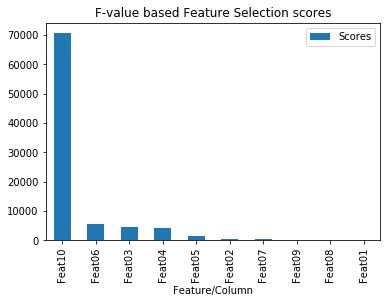

In [12]:
# Feature selection using SelectKBest
# Fit a model using training data using F-value(f_regression) method 
skb = SelectKBest(f_regression).fit(X, y)
# DataFrame of variables w/ corresponding scores
skb_df = pd.DataFrame({"Feature/Column": list(X_train.columns),"Scores":skb.scores_}) 
# Plot a bar plot of scores
skb_df.sort_values("Scores",ascending=False).set_index("Feature/Column").plot(kind="bar")
plt.title("F-value based Feature Selection scores")
plt.show()

Only 5 features(most prominently Feat10) have been deemed significant by this method. Let's estimate the model performance with only five best variables. 

In [13]:
print("3-Fold cross-validation with 5 features")
# 3-Fold cross-validation scored using R^2 score
r2_cross_val = cross_val_score(LinearRegression(),X[["Feat10","Feat06","Feat03","Feat04","Feat05"]],y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
# 3-Fold cross-validation scored using RMSE
rmse_cross_val = cross_val_score(LinearRegression(),X[["Feat10","Feat06","Feat03","Feat04","Feat05"]],y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

3-Fold cross-validation with 5 features
The 3-fold CV R^2 scores are [0.89371822 0.89699838 0.8921628 ] 
with a mean R^2 score of 0.8943
The 3-fold CV RMSE scores are [85.20918580819072, 83.91771114963349, 84.95563140238635] 
with a mean RMSE of 84.6942


Our model loses negligible performance but the new model is lightweight and less likely to overfit. We can check the effect on performance with each new feature addition.

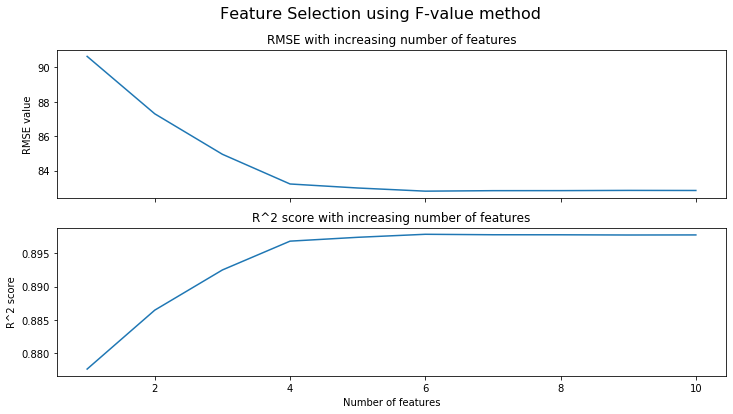

In [14]:
r2 = []
rmse = []
# Iteratively measure R^2 score and RMSE with new feature addition
for i in range(1,X.shape[1]+1):
    skb = SelectKBest(f_regression,k=i).fit(X_train, y_train) # Feature selection object with i best features
    X_train_new = skb.transform(X_train) # Transform data so it has only i features
    X_test_new = skb.transform(X_test)
    model_new = LinearRegression() 
    model_new.fit(X_train_new,y_train) # Train a linear regression model
    y_pred_new = model_new.predict(X_test_new) # Take predictions
    # Record scores for this iteration
    r2.append(r2_score(y_test,y_pred_new)) 
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_new)))

# Plot performance trends
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig.suptitle('Feature Selection using F-value method', fontsize=16)
axs[0].plot(np.arange(1,X.shape[1]+1),rmse)
axs[0].set_title("RMSE with increasing number of features")
axs[0].set_ylabel("RMSE value")
axs[1].plot(np.arange(1,X.shape[1]+1),r2)
axs[1].set_title("R^2 score with increasing number of features")
axs[1].set_xlabel("Number of features")
axs[1].set_ylabel("R^2 score")
plt.show()

Looking at the trend, it is advised to use 5-6 top features for the best possible performance. 

#### Mutual Information method
In this method, we estimate the mutual information for a continuous target variable. Mutual information between two random variables is a value that measures the dependency between them. If two random variables are independent, this value is zero and higher values mean higher dependency.

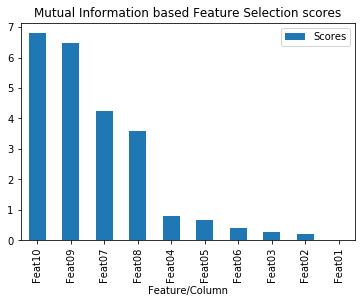

In [15]:
# Feature selection using SelectKBest
# Fit a model using training data using mutual_info_regression method 
skb = SelectKBest(mutual_info_regression).fit(X_train, y_train)
skb_df = pd.DataFrame({"Feature/Column": list(X_train.columns),"Scores":skb.scores_})
skb_df.sort_values("Scores",ascending=False).set_index("Feature/Column").plot(kind="bar")
plt.title("Mutual Information based Feature Selection scores")
plt.show()

Here, we should include all features but Feat01 in our model. The order of importance is also different from F-value method.

In [16]:
print("3-Fold cross-validation with 9 features")
# 3-Fold cross-validation scored using R^2 score
r2_cross_val = cross_val_score(LinearRegression(),X.drop(["Feat01"],axis=1),y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
# 3-Fold cross-validation scored using RMSE
rmse_cross_val = cross_val_score(LinearRegression(),X.drop(["Feat01"],axis=1),y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

3-Fold cross-validation with 9 features
The 3-fold CV R^2 scores are [0.89409152 0.89784605 0.89286033] 
with a mean R^2 score of 0.8949
The 3-fold CV RMSE scores are [85.05941158169952, 83.57169123335169, 84.68042458988003] 
with a mean RMSE of 84.4372


RMSE has actually improved slightly here and R^2 score remains same. So, we only have to remove Feat01. We can check the effect on performance with each new feature addition.

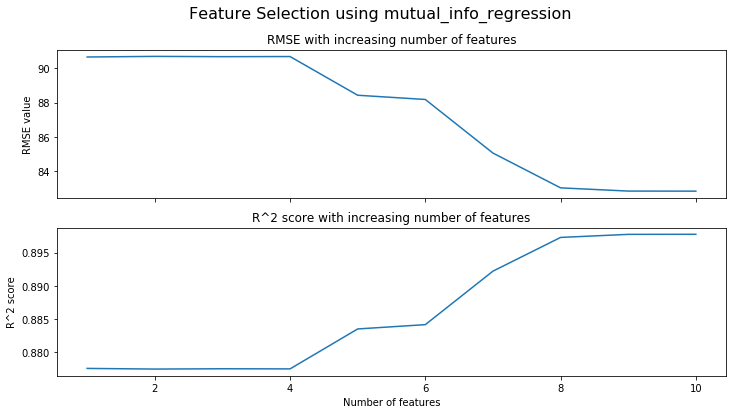

In [17]:
r2 = []
rmse = []
for i in range(1,X.shape[1]+1):
    skb = SelectKBest(mutual_info_regression,k=i).fit(X_train, y_train)
    X_train_new = skb.transform(X_train)
    X_test_new = skb.transform(X_test)
    model_new = LinearRegression()
    model_new.fit(X_train_new,y_train)
    y_pred_new = model_new.predict(X_test_new)
    r2.append(r2_score(y_test,y_pred_new))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_new)))

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6))
fig.suptitle('Feature Selection using mutual_info_regression', fontsize=16)
plt.title("Feature Selection")
axs[0].plot(np.arange(1,X.shape[1]+1),rmse)
axs[0].set_title("RMSE with increasing number of features")
axs[0].set_ylabel("RMSE value")
axs[1].plot(np.arange(1,X.shape[1]+1),r2)
axs[1].set_title("R^2 score with increasing number of features")
axs[1].set_xlabel("Number of features")
axs[1].set_ylabel("R^2 score")
plt.show()

Looking at the trend, it is advised to include 8(or even 9) features in the final model as there is not much improvement in performance with the addition of the last two features. 

#### Recursive Feature Elimination (RFE) method
This method involves feature ranking with recursive feature elimination. The goal is to select features by recusrsively using smaller and smaller sets of features. First, the external estimator(LinearRegression() in our case) is trained on all features. The feature with least importance is pruned. This process repeats till we have the specified number of best features. Let's try this with 5 best features.

In [18]:
selector = RFE(LinearRegression(), n_features_to_select=5, step=1, verbose=1)
selector = selector.fit(X,y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [19]:
# DataFrame of results
rfe_df = pd.DataFrame({"Feature/Column":list(X.columns),"Support":selector.support_,"Ranking":selector.ranking_})
rfe_df.sort_values("Ranking")

,Feature/Column,Support,Ranking
0,Feat01,True,1
5,Feat06,True,1
6,Feat07,True,1
8,Feat09,True,1
9,Feat10,True,1
7,Feat08,False,2
4,Feat05,False,3
2,Feat03,False,4
3,Feat04,False,5
1,Feat02,False,6


Features where <i>Support</i> is True and <i>Ranking</i> is 1 have been selected. Other features have been ranked according to their importance. Let's estimate the model performance with the supported features.

In [20]:
supported_features = rfe_df[rfe_df.Ranking==1]["Feature/Column"].tolist()
print("3-Fold cross-validation with 5 features")
# 3-Fold cross-validation scored using R^2 score
r2_cross_val = cross_val_score(LinearRegression(),X[supported_features],y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
# 3-Fold cross-validation scored using RMSE
rmse_cross_val = cross_val_score(LinearRegression(),X[supported_features],y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

3-Fold cross-validation with 5 features
The 3-fold CV R^2 scores are [0.88408379 0.88575691 0.88108805] 
with a mean R^2 score of 0.8836
The 3-fold CV RMSE scores are [88.98751521970799, 88.37848746784498, 89.21145673642727] 
with a mean RMSE of 88.8592


The RFE method has not performed as well as F-value method which was also validated on 5 features. Clearly, F-value method is a better choice.

**Conclusion:** We have successfully used cross-validation to estimate model performance. We have also used and compared various feature selection techniques.